# CA2
## Problem 1
In this problem, we are given a dataset which has two columns `'BRT'` and `'metro'` and each row shows how many BRTs/trains have arrived at the given range of time (like an hour for example). Let's answer each question in the problem:

### Q1
Drawing the histograms for BRT (`y`) and metro (`x`) datasets:

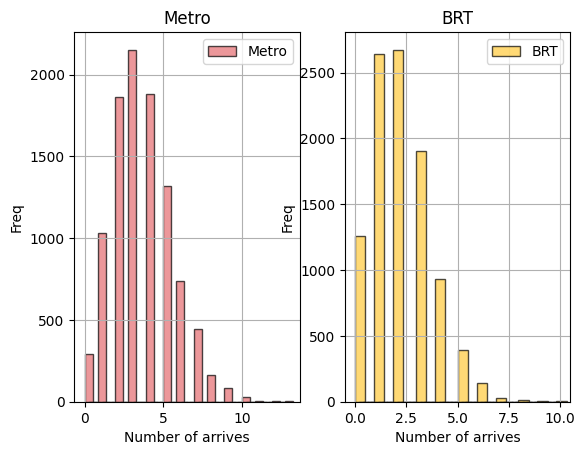

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt 

green = '#57cc99'
red = '#e56b6f'
blue = '#22577a'
yellow = '#ffca3a'

bar_width = 0.5

TARBIAT_CSV_FILE_PATH = "../given-files/Tarbiat.csv"

data = pd.read_csv(TARBIAT_CSV_FILE_PATH)

fig, (ax1, ax2) = plt.subplots(1, 2)

x = data["metro"]
y = data["BRT"]

ax1.hist(x, bins='auto', alpha=0.7, label='Metro', color=red, edgecolor='black', width=bar_width)
ax1.set_title('Metro')
ax1.grid(True)
ax1.legend()
ax1.set_xlabel('Number of arrives')
ax1.set_ylabel('Freq')

ax2.hist(y, bins='auto', alpha=0.7, label='BRT', color=yellow, edgecolor='black', width=bar_width)
ax2.set_title('BRT')
ax2.grid(True)
ax2.legend()
ax2.set_xlabel('Number of arrives')
ax2.set_ylabel('Freq')

plt.show()

### Q2,3 4
We know that for events that happen not so frequently in time, poisson is a good prediction distribution (${p \to 0}$)

A poisson distribution can be fully described with it's parameter, the $\lambda$ which is also equat to $E[X]$. So all we have to do is to calculate the mean for our `x` and `y` datasets and create two poisson variables with calculated $\lambda$s:

In [2]:
x_values = np.arange(0, 10)

x_mean = np.mean(x)
y_mean = np.mean(y)

poisson_x = stats.poisson(x_mean)
pmf_x = poisson_x.pmf(x_values)
poisson_y = stats.poisson(y_mean)
pmf_y = poisson_y.pmf(x_values)

Now, let's draw the denisity histograms for our datasets and $X$ and $Y$ random variables that we just defined:

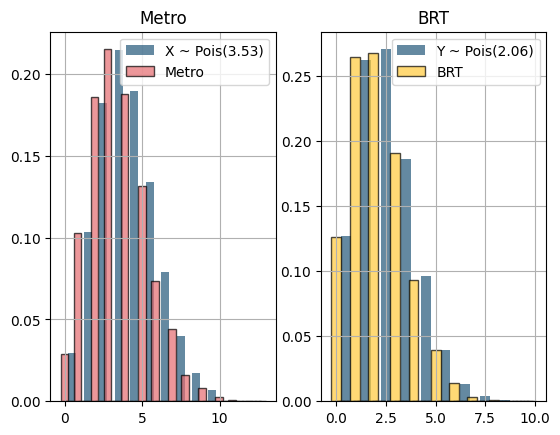

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2)

counts1, bins1, _ = plt.hist(x, bins='auto')
counts2, bins2, _ = plt.hist(y, bins='auto')

plt.cla()

ax1.bar(x_values + bar_width, pmf_x, color=blue, label='X ~ Pois({:.2f})'.format(x_mean), alpha=0.7, width=bar_width)
ax1.bar(bins1[:-1], counts1 / len(x), width=bar_width, alpha=0.7, label='Metro', color=red, edgecolor='black')
ax1.set_title('Metro')
ax1.grid(True)
ax1.legend()

ax2.bar(x_values + bar_width, pmf_y, color=blue, label='Y ~ Pois({:.2f})'.format(y_mean), alpha=0.7, width=bar_width)
ax2.bar(bins2[:-1], counts2 / len(y), width=bar_width, alpha=0.7, label='BRT', color=yellow, edgecolor='black')
ax2.set_title('BRT')
ax2.grid(True)
ax2.legend()

plt.show()

Great! as we can see, it is a good prediction model for our dataset.
### Q5
We know that if $X$ and $Y$ are independent poisson variables with $\lambda_1$ and $\lambda_2$ parameters, then the distribution of $Z = X + Y$ is $Pois(\lambda_1 + \lambda_2)$. So we'll create a poissons pdf with parameter $\lambda_1 + \lambda_2$ and use draw it's histogram, alongside with density histogram for `z = x + y`:

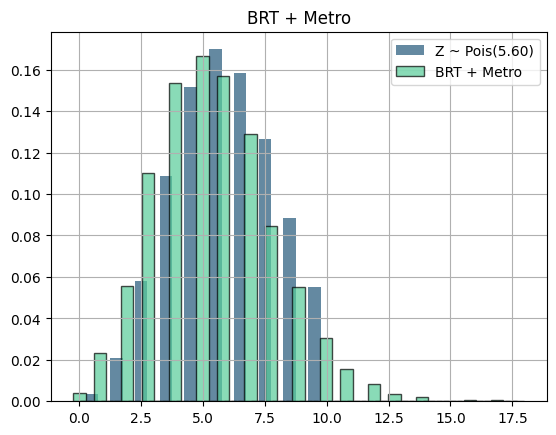

In [4]:
fig, ax = plt.subplots()

z = x + y

counts3, bins3, _ = plt.hist(z, bins='auto')

plt.cla()

poisson_z = stats.poisson(x_mean + y_mean)
pmf_z = poisson_z.pmf(x_values)

ax.bar(x_values + bar_width, pmf_z, color=blue, label='Z ~ Pois({:.2f})'.format(x_mean + y_mean), width=bar_width, alpha=0.7)
ax.bar(bins3[:-1], counts3 / len(z), width=bar_width, alpha=0.7, label='BRT + Metro', color=green, edgecolor='black')
ax.set_title('BRT + Metro')
ax.grid(True)
ax.legend()

plt.show()

As you can see, the pridiction model is again to good fit for our dataset.

### Q6
Let's hand-calculate the pmf of $W$:

$P(W = x) = P(X = x\space|\space X + Y = n)$

Applying the conditional probability formula: $P(X = x\space|\space Y = y) = \frac{P(X = x\space \cap \space Y = y)}{P(Y = y)}$:

$= \frac{P(X = x\space \cap\space Y = n - x)}{P(X + Y = n)} = \frac{P(X = x) * P(Y = n - x)}{P(Z = n)} = \frac{P_x(x)* P_y(n - x)}{P_z(n)}$

We know that for a random variable $X \sim Pois(\lambda)$:

$P_x(x) = \frac{\lambda^{x}}{x!}e^{-\lambda}$

Applying that to our formula we'll get:

$\frac{\lambda_1^{x} * e^{-\lambda_1}}{x!} * \frac{\lambda_2^{n - x} * e^{-\lambda_2}}{(n - x)!} * \frac{n!}{\lambda_1^{n} * e^{-(\lambda_1 + \lambda_2)}} = \binom{n}{x} * \frac{\lambda_1^{x} * \lambda_2^{n - x}}{(\lambda_1 + \lambda_2)^{n}} = \binom{n}{x} * (\frac{\lambda_1}{\lambda_1 + \lambda_2})^{x} * (\frac{\lambda_2}{\lambda_1 + \lambda_2})^{n - x}$

Which is the pmf of a binomial variable with $n = n$ and $p = \frac{\lambda_1}{\lambda_1 + \lambda_2}$:

$W \sim Bin(n, \frac{\lambda_1}{\lambda_1 + \lambda_2})$

### Q7, 8
Let's draw $W$ binomial random variable pmf and $P(X = x\space|\space X + Y = n)$ in action histograms:


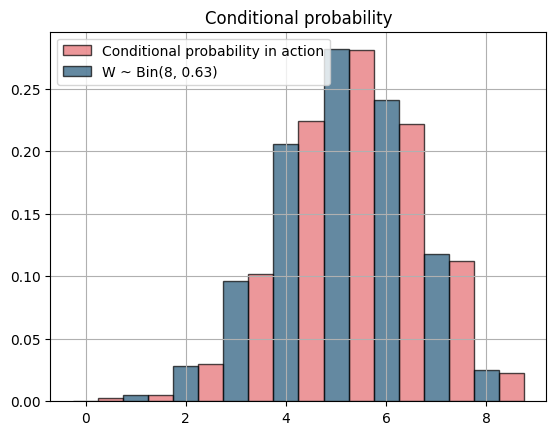

In [5]:
fig, ax = plt.subplots()

p = x_mean / (x_mean + y_mean)
n = 8

w_counts = [0] * (9)
x_values = np.arange(len(w_counts))
pmf_w = stats.binom.pmf(x_values, n, p)

for _, row in data.iterrows():
    if row['metro'] + row['BRT'] == n:
        w_counts[row['metro']] += 1

count = np.count_nonzero((data['metro'] + data['BRT'] == n))
w_counts = [x / count for x in w_counts]

ax.bar(x_values + bar_width, w_counts, color=red, label='Conditional probability in action', alpha=0.7, edgecolor='black', width=bar_width)
ax.bar(x_values, pmf_w, color=blue, label='W ~ Bin(8, {:.2f})'.format(p), alpha=0.7, width=bar_width, edgecolor='black')

ax.set_title('Conditional probability')
ax.grid(True)
ax.legend()

plt.show()

> happy happy happy
## Problem 2
In this problem, we must calculate answer of coupon collector problem with two methods:
### Monte Carlo method:

In this method, we perform the test `k` times and return the average of answers as the final result:

In [6]:
import random

def monte_carlo(n):
    k = 1000
    ans = 0

    for _ in range(k):
        seen = 0
        trial = 0
        while seen != n:
            trial += 1
            if random.random() <= (n - seen) / n:
                seen += 1

        ans += trial

    return ans / k

### Theorical Solution
In this method, we define $n$ random variables $X_i\space\forall i \in 1, 2, 3, ..., n$ where $X_i$ is the number of trials we should do to see the $ith$ unique coupon for the first time, after we've seen all $i - 1$ coupons.

The sum of all $X_i$s is our answer's random variable:

$X = X_1 + X_2 + ... + X_n$

It's clear that $X_i \sim Geo(\frac{n - i + 1}{n})$, because the chance of seeing the $ith$ coupon kowing we've seen all $i - 1$ coupons is $\frac{n - i + 1}{n}.$

We could easily calculate $E[X_i]$ for all $i$s which is $\frac{1}{p_i} = \frac{n}{n - i + 1}$, but the question wants us to calculate expectation using generating functions.

The generating function for $Y \sim Geo(p)$ is:

$P_x(x) = p(1 - p)^{x - 1}$

$\phi(s) = \sum_{x = 0}^{\infty} P_x(x) * e^{sx} = \frac{p * e^{s}}{1 - (1 - p) * e^{s}}$

To calculate $E[X]$ from $\phi(s)$, we can use this formula:

$E[x] = \frac{d \phi(s)}{dx}$ for $s = 0$

And since expectation in linear:

$E[X] = E[X_1 + X_2 + ... + X_n] = E[X_1] + E[X_2] + ... + E[X_n]$

Let's write the code for this:

In [7]:
import sympy as sp

def theorical_solution(n):
    n = int(n)
    expectation = 0

    s = sp.symbols('s')
    x = sp.symbols('x')

    for i in range(1, n + 1):
        p = (n - i + 1) / n
        gen_func = p * sp.exp(s) / (1 - (1 - p) * sp.exp(s))
        deriv = sp.diff(gen_func, s)
        expectation += deriv.subs({s:0})

    return expectation

And now let's draw the diagrams of our two methods:

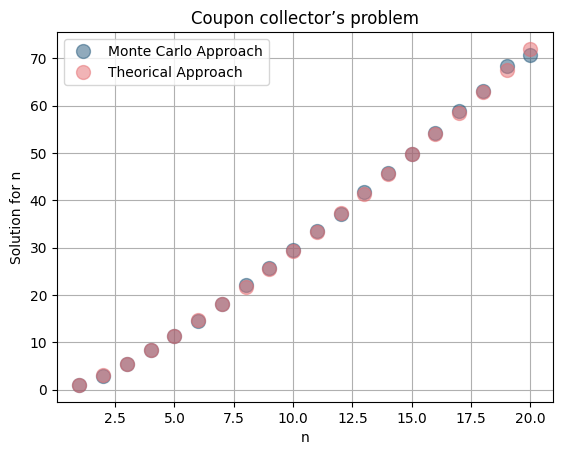

In [8]:
dom = 20
x = np.linspace(1, dom, dom)

mc = [monte_carlo(n) for n in x]
ts = [theorical_solution(n) for n in x]

plt.plot(x, mc, 'o', label='Monte Carlo Approach', color=blue, alpha=0.5, markersize=10)
plt.plot(x, ts, 'o', label='Theorical Approach', color=red, alpha=0.5, markersize=10)

plt.xlabel('n')
plt.ylabel('Solution for n')
plt.title('Coupon collector’s problem')
plt.legend()
plt.grid(True)

plt.show()

Let's calculate $E[X]$ with formula $E[X_1] + E[X_2] + ... + E[X_n]$:

$E[X] = \sum_{i = 1}^{n}\frac{n}{n - i + 1} = n(\frac{1}{1} + \frac{1}{2} + ... + \frac{1}{n}) \simeq nlog(n)$

Let's draw $nlog(n)$ plot with calculated results using Monte Carlo method:

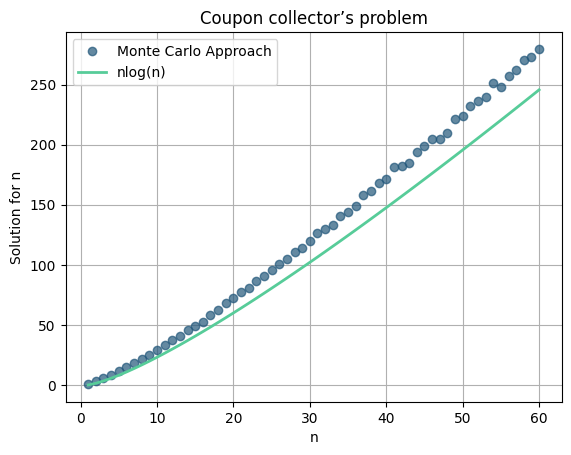

In [9]:
line_thickness = 2

dom = 60
x = np.linspace(1, dom, dom)
mc = [monte_carlo(n) for n in x]

plt.plot(x, mc, 'o', label='Monte Carlo Approach', color=blue, alpha=0.7)
plt.plot(x, x * np.log(x), label='nlog(n)', color=green, linewidth=line_thickness)

plt.xlabel('n')
plt.ylabel('Solution for n')
plt.title('Coupon collector’s problem')
plt.legend()
plt.grid(True)

plt.show()

## Problem 3
### Q1
Here's the code for part 1:

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from time import sleep
from IPython import display

t = 1000
p = np.linspace(0,1,t)
fy = stats.beta.pdf(p, a=1, b=1)

DIGITS_CSV_FILE_PATH = "../given-files/digits.csv"

df = pd.read_csv(DIGITS_CSV_FILE_PATH)

r201 = df.iloc[200]
r202 = df.iloc[201]
df.drop(200, inplace=True)
df.drop(201, inplace=True)

### Q2
We should replace all color numbers $\lt 128$ to $0$, and all numbers $\ge 128$ to $1$:

In [11]:
df.loc[:, df.columns != 'label'] = df.loc[:, df.columns != 'label'].map(lambda x: 0 if x < 128 else 1)

### Q3
I'll choose row number 87:

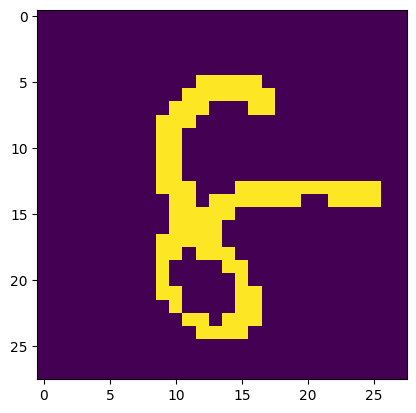

In [12]:
chosen_row = df.iloc[87].values[1:].reshape(28, 28)

plt.imshow(chosen_row)
plt.show()

> happy happy happy

### Q4
This part is the main part. Our program should update $f(Y|N)$ (`fy`) based on it's previous state (`fy`), $P(N = n\space|\space Y = p)$ (`pny`) and $\int_{0}^{1}P(N = n\space|\space Y = p)f(Y)$ `integral`:

$P(N = n\space|\space Y = p) = p^{n}(1 - p)^{1 - n}$

$\int_{0}^{1}P(N = n\space|\space Y = p)f(Y) \simeq \frac{1}{N}\sum_{i = 0}^{N}f(\frac{i}{N})$:

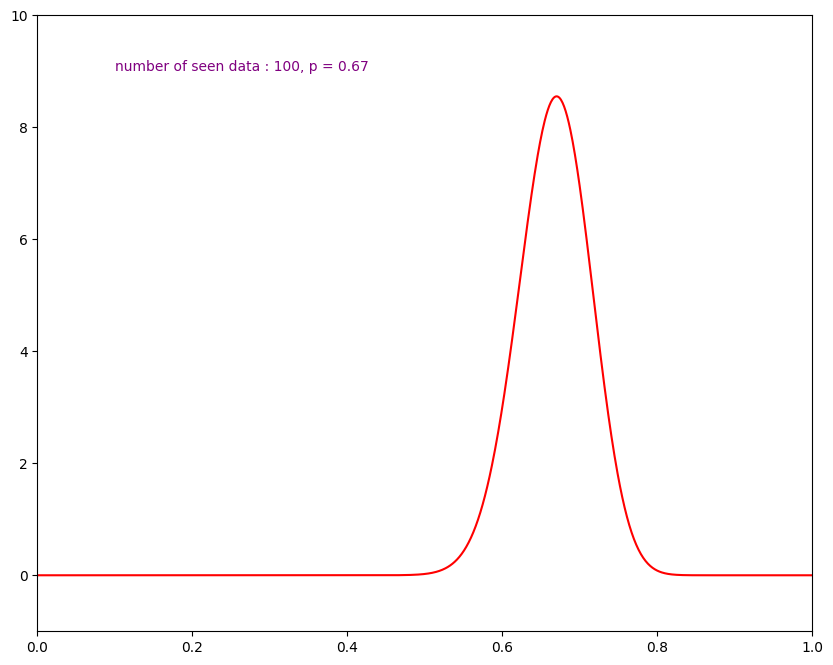

<Figure size 1000x800 with 0 Axes>

In [13]:
def update(fy: np.array, n: bool) -> np.array:
    p = np.linspace(0,1,t)
    pny = p if n else 1 - p
    integral = 0
    for i in range(t):
        integral += fy[i] * pny[i] / 1000
    post = fy * pny / integral
    return post

plt.figure(figsize=(10,8))
for i in range(100):
    n =  df[df['label'] == 8].iloc[i, df.columns.get_loc('pixel404')]
    fy = update(fy, n)

    plt.plot(p, fy, 'r', label='1')
    plt.ylim(-1, 10)
    plt.xlim(0, 1)
    plt.text(0.1,9,f'number of seen data : {i + 1}, p = {fy.argmax() / t :.2f}', color='purple')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.clf()
    sleep(0.05)

We can see that as we observe more data our $f(Y)$ distribution (which is a Beta distribution) is more confident that the probability is $0.67$.